In [1]:
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import all the necessary libraries (packages)
import numpy as np # Mathematical Calculations  
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt  # Plotting and Graphs and Charts
%matplotlib inline
import seaborn as sns # Advanced plotting (Charts in 1 line of code)
sns.set()
import pandas_datareader as pdr # Extracting Data from external sources
from pandas_datareader import data, wb
import datetime
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define the ticker list
tickers_list = ['MAR', 'CHH', 'H', 'IHG','MGM']

# Fetch the data
import yfinance as yf
df1 = yf.download(tickers_list,'2012-12-31',interval = '1mo')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
df1

,CHH,H,IHG,MAR,MGM
Date,,,,,
2013-01-01,32.146606,39.267372,27.521652,35.909477,12.061401
2013-02-01,33.921619,40.266945,27.249815,35.433441,11.796933
2013-03-01,37.739258,42.364075,28.515289,38.058796,12.420313
2013-04-01,34.995495,41.825092,28.100527,38.806824,13.336487
2013-05-01,35.371788,40.296341,27.311239,37.860535,14.328224
...,...,...,...,...,...
2022-11-01,122.958183,100.320000,58.820000,164.551254,36.856960
2022-12-01,112.400665,90.449997,58.340000,148.540878,33.527233
2023-01-01,122.889999,109.120003,70.750000,173.771576,41.410000


In [5]:
df2 = df1.pct_change()
df2 = np.log(df2 + 1 )
df2

,CHH,H,IHG,MAR,MGM
Date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-02-01,0.053746,0.025137,-0.009926,-0.013345,-0.022171
2013-03-01,0.106648,0.050770,0.045394,0.071476,0.051494
2013-04-01,-0.075482,-0.012804,-0.014652,0.019464,0.071170
2013-05-01,0.010695,-0.037236,-0.028490,-0.024687,0.071728
...,...,...,...,...,...
2022-11-01,-0.052332,0.062839,0.070062,0.032203,0.035624
2022-12-01,-0.089774,-0.103568,-0.008194,-0.102362,-0.094686
2023-01-01,0.089220,0.187651,0.192865,0.156881,0.211164


In [6]:
from scipy import stats

In [7]:
df1.describe()

,CHH,H,IHG,MAR,MGM
count,123.000000,123.000000,123.000000,123.000000,123.000000
mean,74.865760,65.260514,49.516060,101.080704,26.997505
std,31.489398,17.656123,13.118685,40.737312,8.424263
min,32.146606,37.905212,26.122555,35.433441,11.701716
25%,47.545715,50.311626,38.165403,65.892853,20.964690
50%,72.986229,59.758533,51.613312,99.631737,26.043432
75%,98.163494,76.862820,60.794691,135.237488,31.521513
max,154.502777,122.800003,70.750000,176.019760,47.140842


In [8]:
df2.describe()

,CHH,H,IHG,MAR,MGM
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.011096,0.009346,0.007572,0.012891,0.010956
std,0.078064,0.090325,0.080578,0.091792,0.122256
min,-0.398968,-0.467148,-0.268459,-0.501328,-0.733020
25%,-0.035292,-0.040616,-0.029780,-0.032382,-0.054242
50%,0.009450,0.012376,0.007015,0.009609,0.004725
75%,0.060472,0.055557,0.057895,0.066707,0.070939
max,0.203191,0.292278,0.217509,0.311855,0.362447


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2013-01-01 to 2023-03-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHH     123 non-null    float64
 1   H       123 non-null    float64
 2   IHG     123 non-null    float64
 3   MAR     123 non-null    float64
 4   MGM     123 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2013-01-01 to 2023-03-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHH     122 non-null    float64
 1   H       122 non-null    float64
 2   IHG     122 non-null    float64
 3   MAR     122 non-null    float64
 4   MGM     122 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


In [11]:
df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [12]:
from statsmodels.stats.descriptivestats import describe
describe(df1)

,CHH,H,IHG,MAR,MGM
nobs,123.000000,123.000000,123.000000,123.000000,123.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000
mean,74.865760,65.260514,49.516060,101.080704,26.997505
std_err,2.839303,1.591999,1.182872,3.673160,0.759590
upper_ci,80.430692,68.380775,51.834446,108.279965,28.486275
lower_ci,69.300827,62.140253,47.197673,93.881443,25.508736
std,31.489398,17.656123,13.118685,40.737312,8.424263
iqr,50.617779,26.551193,22.629288,69.344635,10.556823
iqr_normal,37.523016,19.682429,16.775116,51.405255,7.825784
mad,26.128204,15.004626,11.704676,36.106114,6.749272


In [13]:

describe(df2)

,CHH,H,IHG,MAR,MGM
nobs,1.220000e+02,1.220000e+02,122.000000,1.220000e+02,1.220000e+02
missing,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
mean,1.109638e-02,9.345599e-03,0.007572,1.289094e-02,1.095633e-02
std_err,7.067594e-03,8.177639e-03,0.007295,8.310466e-03,1.106858e-02
upper_ci,2.494861e-02,2.537348e-02,0.021870,2.917916e-02,3.265035e-02
lower_ci,-2.755855e-03,-6.682279e-03,-0.006727,-3.397273e-03,-1.073769e-02
std,7.806413e-02,9.032498e-02,0.080578,9.179210e-02,1.222565e-01
iqr,9.576465e-02,9.617303e-02,0.087676,9.908913e-02,1.251806e-01
iqr_normal,7.099044e-02,7.129317e-02,0.064994,7.345488e-02,9.279654e-02
mad,5.688701e-02,6.326091e-02,0.061054,6.429480e-02,8.143993e-02


In [14]:
from statsmodels.stats.stattools import jarque_bera

In [15]:
pd.DataFrame(jarque_bera(df1.dropna()),index = ['JB','p-value','skewness','kurtosis'],columns=df1.columns)

,CHH,H,IHG,MAR,MGM
JB,10.877274,9.856108,9.103641,7.782111,5.070402
p-value,0.004345,0.007241,0.010548,0.020424,0.079246
skewness,0.654204,0.692019,-0.118996,0.081697,0.454562
kurtosis,2.359326,3.087061,1.688634,1.778623,2.596465


In [16]:
pd.DataFrame(jarque_bera(df2.dropna()),index = ['JB','p-value','skewness','kurtosis'],columns = df2.columns)

,CHH,H,IHG,MAR,MGM
JB,1.559106e+02,2.026176e+02,7.547604,3.275286e+02,6.130490e+02
p-value,1.394557e-34,1.004943e-44,0.022965,7.551950e-72,7.552692e-134
skewness,-1.043866e+00,-7.293497e-01,-0.377684,-1.060226e+00,-1.310774e+00
kurtosis,8.129554e+00,9.142589e+00,3.956135,1.074180e+01,1.366430e+01


In [17]:
from statsmodels.stats.stattools import omni_normtest
pd.DataFrame(omni_normtest(df1.dropna()),index = ['Statistic','p-value'],columns = df1.columns)

,CHH,H,IHG,MAR,MGM
Statistic,11.901674,9.465815,8.312563e+01,5.096610e+01,5.136112
p-value,0.002604,0.008801,8.902217e-19,8.567446e-12,0.076684


In [18]:
from statsmodels.stats.stattools import omni_normtest
pd.DataFrame(omni_normtest(df2.dropna()),index = ['Statistic','p-value'],columns = df2.columns)

,CHH,H,IHG,MAR,MGM
Statistic,3.947537e+01,3.472782e+01,6.889592,4.720322e+01,6.000773e+01
p-value,2.679370e-09,2.877064e-08,0.031911,5.622785e-11,9.321529e-14


<AxesSubplot:xlabel='Date'>

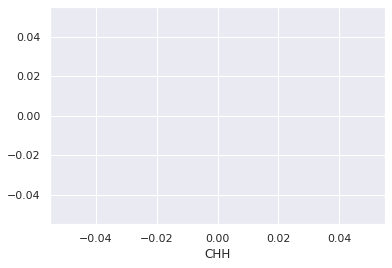

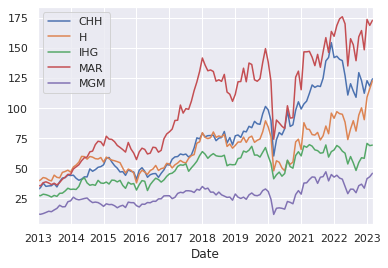

In [19]:
cols = df1.columns
for col in cols:
    sns.lineplot(df1[col])
    
df1.plot()

<AxesSubplot:xlabel='Date'>

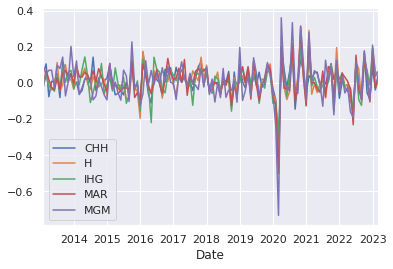

In [20]:
df2.plot()


In [21]:
from statsmodels.tsa.stattools import acf, pacf, pacf_ols, adfuller, kpss, bds, zivot_andrews
cols = df1.columns
for col in cols:
    print(col)
    print(pd.DataFrame(adfuller(df1[col].dropna())[0:2],index = ['adf statistic','p value'], columns = ['']))
    print('\n')

for col in cols:
    print(col)
    print(pd.DataFrame(kpss(df1[col].dropna())[0:2],index = ['KPSS statistic','p value'], columns = ['']))
    print('\n')

CHH
                       
adf statistic -0.964930
p value        0.765839


H
                       
adf statistic  0.271699
p value        0.976008


IHG
                       
adf statistic -1.803492
p value        0.378730


MAR
                       
adf statistic -0.852483
p value        0.803218


MGM
                       
adf statistic -1.198268
p value        0.674340


CHH
                        
KPSS statistic  1.677472
p value         0.010000


H
                       
KPSS statistic  1.42375
p value         0.01000


IHG
                        
KPSS statistic  1.565845
p value         0.010000


MAR
                        
KPSS statistic  1.626535
p value         0.010000


MGM
                        
KPSS statistic  1.156761
p value         0.010000




/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-va

In [22]:
from statsmodels.tsa.stattools import acf, pacf, pacf_ols, adfuller, kpss, bds, zivot_andrews
cols = df2.columns
for col in cols:
    print(col)
    print(pd.DataFrame(adfuller(df2[col].dropna())[0:2],index = ['adf statistic','p value'], columns = ['']))
    print('\n')

for col in cols:
    print(col)
    print(pd.DataFrame(kpss(df2[col].dropna())[0:2],index = ['KPSS statistic','p value'], columns = ['']))
    print('\n')

CHH
                           
adf statistic -1.276271e+01
p value        8.078977e-24


H
                       
adf statistic -3.940878
p value        0.001754


IHG
                           
adf statistic -9.528392e+00
p value        2.935449e-16


MAR
                           
adf statistic -1.298415e+01
p value        2.901863e-24


MGM
                           
adf statistic -1.272038e+01
p value        9.856572e-24


CHH
                        
KPSS statistic  0.050237
p value         0.100000


H
                       
KPSS statistic  0.06769
p value         0.10000


IHG
                        
KPSS statistic  0.062779
p value         0.100000


MAR
                        
KPSS statistic  0.083658
p value         0.100000


MGM
                        
KPSS statistic  0.057085
p value         0.100000




/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-va

In [23]:
# Test of independence
for col in cols:
    print(col)
    print(pd.DataFrame(bds(df1[col].dropna())[0:2],index = ['BDS statistic','p value'], columns = ['']))
    print('\n')

CHH
                            
BDS statistic   3.323907e+01
p value        2.936752e-242


H
                            
BDS statistic   2.816417e+01
p value        1.607313e-174


IHG
                        
BDS statistic  58.241401
p value         0.000000


MAR
                        
BDS statistic  55.243505
p value         0.000000


MGM
                            
BDS statistic   2.479040e+01
p value        1.137756e-135




In [24]:
# Test of independence
cols = df2.columns
for col in cols:
    print(col)
    print(pd.DataFrame(bds(df2[col].dropna())[0:2],index = ['BDS statistic','p value'], columns = ['']))
    print('\n')

CHH
                       
BDS statistic  3.182213
p value        0.001462


H
                       
BDS statistic  2.593152
p value        0.009510


IHG
                       
BDS statistic  1.107655
p value        0.268011


MAR
                       
BDS statistic  2.502671
p value        0.012326


MGM
                       
BDS statistic  2.894461
p value        0.003798




In [25]:
# Test of structural break
cols = df1.columns
for col in cols:
    print(col)
    print(pd.DataFrame(zivot_andrews(df1[col].dropna())[0:2],index = ['Zivot Andrews statistic','p value'], columns = ['']))
    print('\n')

CHH
                                 
Zivot Andrews statistic -4.393320
p value                  0.154478


H
                                 
Zivot Andrews statistic -2.652701
p value                  0.973123


IHG
                                 
Zivot Andrews statistic -4.667259
p value                  0.077065


MAR
                                 
Zivot Andrews statistic -4.609144
p value                  0.090251


MGM
                                 
Zivot Andrews statistic -4.131907
p value                  0.274526




In [26]:
# Test of structural break
cols = df2.columns
for col in cols:
    print(col)
    print(pd.DataFrame(zivot_andrews(df2[col].dropna())[0:2],index = ['Zivot Andrews statistic','p value'], columns = ['']))
    print('\n')

CHH
                                  
Zivot Andrews statistic -12.896153
p value                   0.000010


H
                                 
Zivot Andrews statistic -4.393796
p value                  0.154297


IHG
                                 
Zivot Andrews statistic -9.705937
p value                  0.000010


MAR
                                  
Zivot Andrews statistic -13.340784
p value                   0.000010


MGM
                                 
Zivot Andrews statistic -13.37337
p value                   0.00001




**ACF and PACF**

In [27]:
cols = df1.columns
for col in cols:
    print(col)
    print(acf(df1[col].dropna()))
    
for col in cols:
    print(col)
    print(pacf(df1[col].dropna()))

CHH
[1.         0.96196836 0.93191947 0.90481669 0.87747031 0.84656389
 0.81681779 0.79219517 0.76415556 0.7368733  0.71998075 0.69270216
 0.66127646 0.62491187 0.59065155 0.56197782 0.52374306 0.48795122
 0.45023294 0.42189554 0.40291991]
H
[1.         0.88562991 0.80356906 0.73403384 0.67381233 0.60090477
 0.54672502 0.5185312  0.47507121 0.44946619 0.47007662 0.43089769
 0.40739075 0.3829424  0.34200914 0.30653134 0.26162742 0.25204146
 0.21243525 0.1930899  0.19985664]
IHG
[1.         0.93151269 0.87412946 0.82467662 0.77638676 0.73455769
 0.69747816 0.66815986 0.63571416 0.60544188 0.59018395 0.56019357
 0.54194802 0.52677185 0.51005496 0.49412161 0.47817837 0.47236474
 0.4426392  0.42394359 0.41174207]
MAR
[1.         0.94431255 0.902325   0.86224277 0.82100893 0.77986361
 0.74353457 0.71269785 0.67126864 0.63504351 0.6213398  0.57783545
 0.54500834 0.51518677 0.48560575 0.4599883  0.42941562 0.4071015
 0.36966346 0.34554949 0.33899889]
MGM
[1.         0.90250767 0.82890097 0.753

In [28]:
cols = df2.columns
for col in cols:
    print(col)
    print(acf(df2[col].dropna()))
    
for col in cols:
    print(col)
    print(pacf(df2[col].dropna()))

CHH
[ 1.         -0.15515186 -0.09360051 -0.00589642  0.06572722 -0.15921909
  0.07828436 -0.03191293  0.01723957 -0.10381873  0.04725678 -0.04841508
  0.11269492 -0.08728732 -0.1175129   0.08899593  0.02346623  0.06188299
 -0.12531062 -0.09431878 -0.01789582]
H
[ 1.         -0.19460847 -0.0652022   0.13292322  0.05321174 -0.11878896
 -0.02875974  0.00463287 -0.08043015 -0.2006001   0.29434191 -0.2418512
 -0.00111415  0.09501151  0.03649391 -0.00203729 -0.07022357  0.17106445
 -0.07610047 -0.15222492  0.11501563]
IHG
[ 1.00000000e+00 -1.20469245e-01 -1.44596965e-01  5.22099498e-02
 -2.01281393e-02 -8.33682264e-03  1.06977749e-02 -6.83774205e-02
 -2.61949457e-02 -5.54196964e-02  5.12967589e-02 -1.00721250e-01
 -9.15570444e-02  3.64039057e-03  3.79512075e-02  1.71860732e-03
  8.00283154e-04  1.58642490e-01 -1.07702383e-01 -7.25927703e-02
  1.37900159e-03]
MAR
[ 1.         -0.17213536 -0.05486767  0.11468448  0.01107847 -0.09431804
  0.04808131  0.07890468 -0.11166668 -0.17838428  0.23501

CHH
Figure(432x288)
H
Figure(432x288)
IHG
Figure(432x288)
MAR
Figure(432x288)
MGM
Figure(432x288)
CHH
Figure(432x288)
H
Figure(432x288)
IHG
Figure(432x288)
MAR
Figure(432x288)
MGM
Figure(432x288)


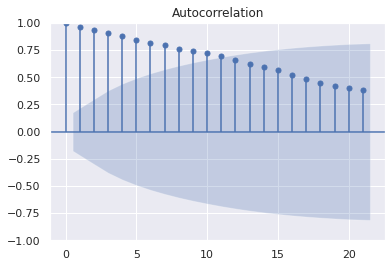

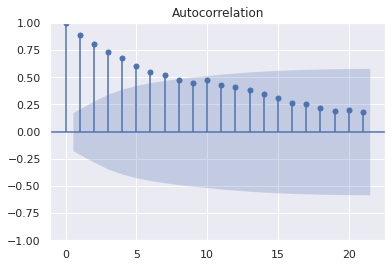

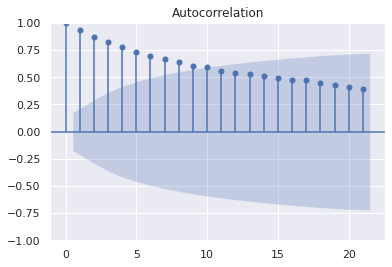

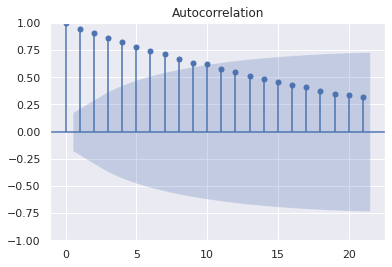

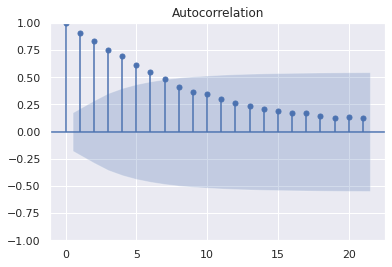

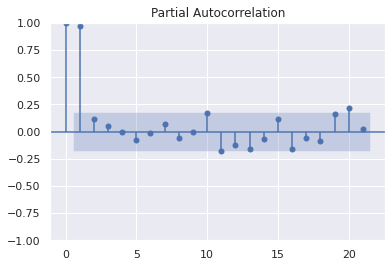

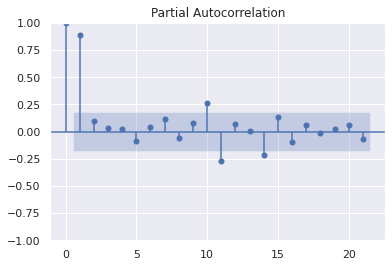

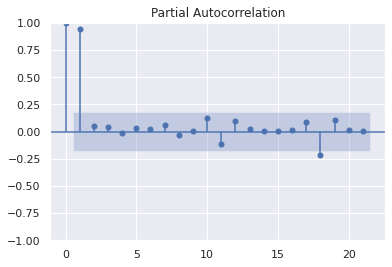

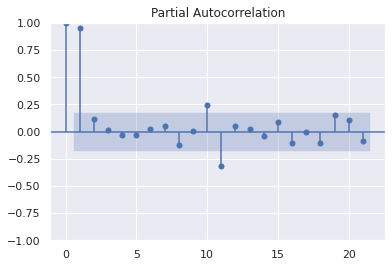

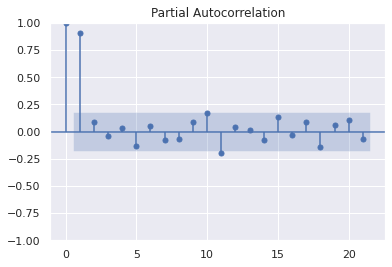

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
cols = df1.columns
for col in cols:
    print(col)
    print(plot_acf(df1[col].dropna()))
    
for col in cols:
    print(col)
    print(plot_pacf(df1[col].dropna()))

CHH
Figure(432x288)
H
Figure(432x288)
IHG
Figure(432x288)
MAR
Figure(432x288)
MGM
Figure(432x288)
CHH
Figure(432x288)
H
Figure(432x288)
IHG
Figure(432x288)
MAR
Figure(432x288)
MGM
Figure(432x288)


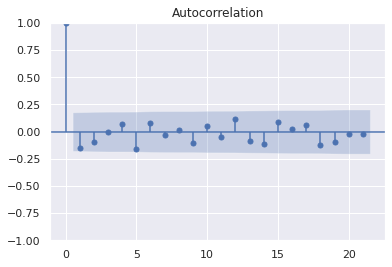

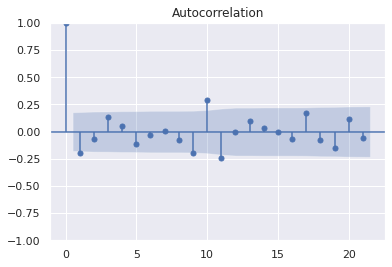

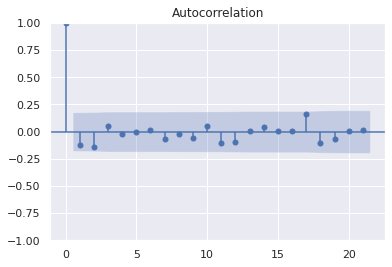

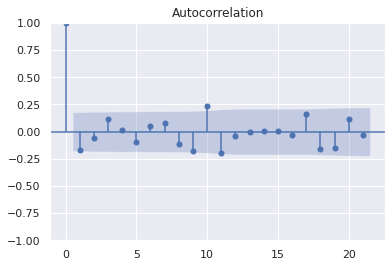

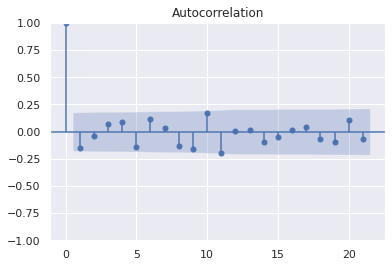

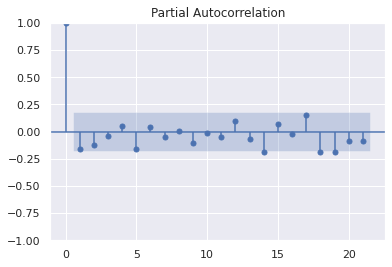

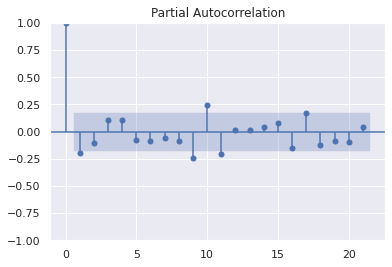

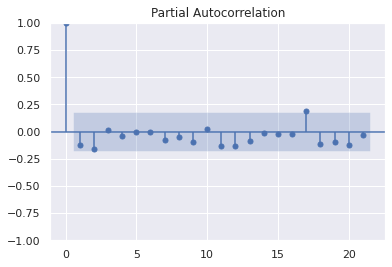

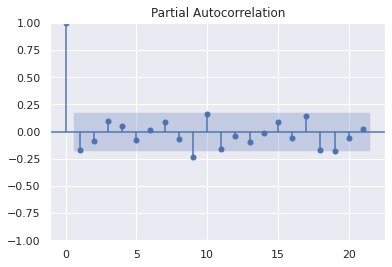

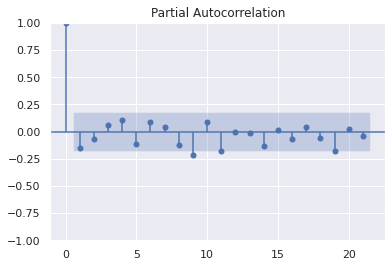

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
cols = df2.columns
for col in cols:
    print(col)
    print(plot_acf(df2[col].dropna()))
    
for col in cols:
    print(col)
    print(plot_pacf(df2[col].dropna()))

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_lm
cols = df1.columns
for col in cols:
    print(col)
    print(acorr_ljungbox(df1[col].dropna()))

CHH
       lb_stat      lb_pvalue
1   116.621029   3.475119e-27
2   226.974635   5.165166e-50
3   331.869708   1.256421e-71
4   431.349078   4.672462e-92
5   524.728804  3.662602e-111
6   612.404585  4.918781e-129
7   695.585083  6.172582e-146
8   773.654483  9.791201e-162
9   846.885643  1.709435e-176
10  917.416386  1.135777e-190
H
       lb_stat      lb_pvalue
1    98.846169   2.728975e-23
2   180.895712   5.235948e-40
3   249.930190   6.775255e-54
4   308.590731   1.518912e-65
5   355.639084   1.068921e-74
6   394.918694   3.457955e-82
7   430.556169   6.635725e-89
8   460.730295   1.855472e-94
9   487.976395   2.156094e-99
10  518.042279  6.143425e-105
IHG
       lb_stat      lb_pvalue
1   109.353539   1.357750e-25
2   206.445051   1.482609e-45
3   293.581778   2.436707e-63
4   371.461501   4.067951e-79
5   441.766294   2.932389e-93
6   505.694201  4.989081e-106
7   564.866427  8.920202e-118
8   618.897183  2.023092e-128
9   668.334533  4.423727e-138
10  715.727235  2.638350e-147


In [32]:
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_lm
cols = df2.columns
for col in cols:
    print(col)
    print(acorr_ljungbox(df2[col].dropna()))

CHH
      lb_stat  lb_pvalue
1    3.009609   0.082772
2    4.114086   0.127831
3    4.118506   0.248949
4    4.672353   0.322597
5    7.950180   0.159003
6    8.749413   0.188169
7    8.883386   0.261137
8    8.922825   0.348848
9   10.365786   0.321692
10  10.667428   0.384008
H
      lb_stat  lb_pvalue
1    4.734996   0.029555
2    5.270947   0.071685
3    7.517084   0.057121
4    7.880090   0.096071
5    9.704607   0.084051
6    9.812475   0.132774
7    9.815299   0.199284
8   10.673748   0.220879
9   16.060976   0.065619
10  27.763180   0.001970
IHG
     lb_stat  lb_pvalue
1   1.814465   0.177974
2   4.450302   0.108051
3   4.796832   0.187293
4   4.848773   0.303169
5   4.857760   0.433485
6   4.872684   0.560243
7   5.487733   0.600664
8   5.578789   0.694296
9   5.989969   0.740922
10  6.345390   0.785459
MAR
      lb_stat  lb_pvalue
1    3.704557   0.054264
2    4.084076   0.129764
3    5.756106   0.124098
4    5.771840   0.216848
5    6.922072   0.226501
6    7.223564   0.3006

**Univariate Models**

In [33]:
from statsmodels.tsa.ar_model import ar_select_order
cols = df2.columns
for col in cols:
    print(col)
    best_mod = ar_select_order(df2[col].dropna(), maxlag=25, ic = 'hqic')
    print(best_mod.ar_lags)

CHH
None
H
[1]
IHG
None
MAR
[1]
MGM
None


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

In [34]:
from statsmodels.tsa.stattools import arma_order_select_ic
cols = df2.columns
for col in cols:
    print(col)
    print(arma_order_select_ic(df2[col].dropna(),ic=["aic", "bic"],  max_ar = 5, max_ma = 5))

CHH


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -273.037918 -274.840745 -273.996818 -272.047597 -270.138902 -270.688198
1 -274.000243 -279.248738 -271.036301 -272.473643 -271.297149 -270.654603
2 -273.815403 -277.760139 -276.389304 -271.467570 -269.198690 -270.418738
3 -272.027109 -269.991774 -269.071111 -268.567766 -275.369155 -266.462070
4 -270.324352 -270.875535 -268.435974 -273.537321 -271.953987 -267.472842
5 -271.134283 -269.796132 -269.362169 -266.044398 -264.513062 -260.075702, 'bic':             0           1           2           3           4           5
0 -267.429876 -266.428682 -262.780734 -258.027491 -253.314776 -251.060050
1 -265.588179 -268.032654 -257.016196 -255.649517 -251.669002 -248.222435
2 -262.599319 -263.740034 -259.565178 -251.839423 -246.766521 -245.182549
3 -258.007004 -253.167647 -249.442964 -246.135597 -250.132966 -238.421860
4 -253.500226 -251.247388 -246.003806 -248.301131 -243.913776 -236.628610
5 -251.506135 -247.363

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -237.442383 -240.750383 -238.761507 -239.652718 -237.820768 -236.889706
1 -240.125602 -238.754600 -237.081492 -237.718581 -239.584563 -240.069620
2 -239.543244 -236.142032 -242.360277 -236.437093 -236.251641 -238.158244
3 -238.789163 -237.211647 -241.741879 -234.345327 -232.829678 -235.399711
4 -238.091360 -236.375142 -239.828916 -232.696209 -230.644390 -229.884215
5 -236.762378 -240.982095 -235.557800 -235.651987 -230.294791 -231.266546, 'bic':             0           1           2           3           4           5
0 -231.834341 -232.338320 -227.545422 -225.632613 -220.996642 -217.261559
1 -231.713539 -227.538516 -223.061387 -220.894455 -219.956415 -217.637451
2 -228.327160 -222.121927 -225.536150 -216.808945 -213.819473 -212.922054
3 -224.769058 -220.387520 -222.113732 -211.913159 -207.593488 -207.359500
4 -221.267233 -216.746994 -217.396748 -207.460020 -202.604180 -199.039983
5 -217.134231 -218.549

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -265.304131 -265.807614 -266.156244 -264.346656 -262.435629 -260.705756
1 -265.073868 -268.790508 -264.369173 -262.373351 -265.082831 -258.699205
2 -266.252058 -264.298445 -262.380743 -260.369716 -262.238933 -260.176546
3 -264.278804 -262.269610 -263.823367 -263.045785 -260.080982 -259.937233
4 -262.438290 -260.440725 -262.541691 -258.526387 -257.954774 -255.958735
5 -260.440797 -261.465902 -260.328183 -257.871583 -256.416019 -255.030777, 'bic':             0           1           2           3           4           5
0 -259.696089 -257.395551 -254.940160 -250.326551 -245.611503 -241.077609
1 -256.661805 -257.574424 -250.349068 -245.549225 -245.454683 -236.267037
2 -255.035974 -250.278339 -245.556617 -240.741569 -239.806764 -234.940357
3 -250.258699 -245.445484 -244.195219 -240.613617 -234.844793 -231.897023
4 -245.614164 -240.812577 -240.109522 -233.290198 -229.914564 -225.114503
5 -240.812650 -239.033

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -233.510999 -235.559503 -233.585108 -232.959178 -230.979535 -229.234327
1 -235.153724 -233.570152 -231.898885 -230.967538 -232.429694 -229.910682
2 -234.065332 -232.464392 -237.068114 -235.772915 -233.678437 -228.132994
3 -233.130797 -231.222904 -235.840719 -233.426772 -231.439128 -227.534292
4 -231.364872 -230.300414 -234.077020 -231.861289 -232.288175 -227.302409
5 -230.055547 -228.061366 -228.849539 -230.283352 -229.297554 -229.461216, 'bic':             0           1           2           3           4           5
0 -227.902957 -227.147440 -222.369024 -218.939072 -214.155409 -209.606180
1 -226.741661 -222.354068 -217.878779 -214.143411 -212.801546 -207.478514
2 -222.849248 -218.444286 -220.243987 -216.144768 -211.246269 -202.896804
3 -219.110692 -214.398777 -216.212572 -210.994604 -206.202938 -199.494081
4 -214.540746 -210.672266 -211.644851 -206.625100 -204.247965 -196.458177
5 -210.427399 -205.629

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0 -163.581893 -164.680219 -162.696199 -161.477668 -160.237037 -158.710275
1 -164.444060 -162.687847 -160.680243 -159.742713 -160.377158 -158.386062
2 -162.922657 -160.881443 -164.811612 -163.725434 -161.852065 -159.635759
3 -161.277572 -159.649082 -163.191316 -163.019358 -159.884481 -157.718952
4 -160.686709 -160.672566 -158.476187 -161.469592 -158.103543 -161.594079
5 -160.079169 -158.455104 -159.206563 -160.791093 -157.509307 -157.760887, 'bic':             0           1           2           3           4           5
0 -157.973850 -156.268156 -151.480115 -147.457563 -143.412911 -139.082128
1 -156.031997 -151.471763 -146.660138 -142.918586 -140.749011 -135.953894
2 -151.706573 -146.861338 -147.987486 -144.097286 -139.419897 -134.399570
3 -147.257467 -142.824956 -143.563169 -140.587190 -134.648291 -129.678742
4 -143.862582 -141.044419 -136.044019 -136.233402 -130.063333 -130.749848
5 -140.451022 -136.022

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
from statsmodels.tsa.stattools import arma_order_select_ic
cols = df1.columns
for col in cols:
    print(col)
    print(arma_order_select_ic(df1[col].dropna(),ic=["aic", "bic"],  max_ar = 5, max_ma = 5))

CHH


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':              0            1           2           3           4           5
0  1200.668915  1071.104046  990.754716  952.160641  903.363180  885.732923
1   812.621249   812.800518  814.334721  815.680396  817.661766  819.272454
2   813.085935   816.348740  816.010374  817.674540  818.172913  818.505255
3   813.995835   815.659027  815.260271  813.861056  817.560836  812.629686
4   815.369820   817.369600  814.602315  815.965432  819.599623  814.850526
5   817.369563   818.229217  818.566741  821.125076  815.308875  813.816957, 'bic':              0            1            2           3           4           5
0  1206.293284  1079.540599  1002.003454  966.221562  920.236286  905.418213
1   821.057802   824.049256   828.395642  832.553502  837.347056  841.769928
2   824.334672   830.409662   832.883480  837.359830  840.670388  843.814914
3   828.056757   832.532133   834.945561  836.358530  842.870495  840.751529
4   832.242926   837.054890   837.099790  841.275091  847.721466  8

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':              0           1           2           3           4           5
0  1058.341118  956.812656  903.130292  878.647055  855.517759  845.534005
1   806.434061  805.370060  807.006006  805.784755  807.771155  809.610125
2   805.294570  807.265051  807.899685  807.776308  809.261317  804.713063
3   807.208550  808.637168  800.262834  802.265734  806.153499  808.112731
4   806.198008  808.080995  802.361215  804.115451  805.012735  804.872350
5   807.954871  808.498974  801.993405  805.377217  806.819605  801.942736, 'bic':              0           1           2           3           4           5
0  1063.965487  965.249209  914.379029  892.707977  872.390865  865.219296
1   814.870614  816.618797  821.066928  822.657861  827.456446  832.107600
2   816.543307  821.325973  824.772791  827.461599  831.758792  830.022722
3   821.269472  825.510274  819.948125  824.763209  831.463158  836.234574
4   823.071114  827.766285  824.858690  829.425110  833.134578  835.806378
5   827.6

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0  985.268028  867.615662  816.227613  779.568104  758.510885  749.465910
1  699.822451  700.569795  702.149371  702.821377  704.322169  706.233713
2  700.749714  702.097035  703.300619  704.547096  705.350890  707.420812
3  701.871779  702.688107  704.240008  706.233626  706.183762  706.984522
4  702.588049  704.275587  706.232511  705.882798  707.418347  709.846347
5  704.188227  705.070636  708.079873  707.511045  708.034241  709.882233, 'bic':             0           1           2           3           4           5
0  990.892397  876.052215  827.476351  793.629026  775.383992  769.151201
1  708.259004  711.818533  716.210293  719.694483  724.007460  728.731188
2  711.998452  716.157957  720.173725  724.232387  727.848365  732.730471
3  715.932701  719.561213  723.925299  728.731101  731.493421  735.106366
4  719.461155  723.960877  728.729985  731.192457  735.540191  740.780374
5  723.873518  727.568

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':              0            1            2            3            4  \
0  1264.012321  1142.468321  1077.992672  1039.465841  1002.894016   
1   932.675778   930.482559   932.450264   932.477645   932.797420   
2   930.726672   932.471774   933.815060   933.779542   934.791714   
3   932.069794   932.573389   925.073382   926.866836   932.575365   
4   931.312239   933.212833   926.857610   928.417491   930.869450   
5   933.142124   934.858105   929.037460   930.805842   932.867660   

             5  
0  1003.889520  
1   934.782505  
2   931.583469  
3   931.646462  
4   936.563155  
5   934.083030  , 'bic':              0            1            2            3            4  \
0  1269.636689  1150.904874  1089.241410  1053.526763  1019.767123   
1   941.112332   941.731296   946.511186   949.350751   952.482710   
2   941.975410   946.532696   950.688166   953.464833   957.289188   
3   946.130716   949.446495   944.758672   949.364311   957.885024   
4   948.185345   952.898

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

{'aic':             0           1           2           3           4           5
0  876.309340  778.329232  715.609219  694.196586  665.190932  661.801393
1  626.967992  627.510681  628.761061  630.027486  630.685818  632.618820
2  627.300746  627.001228  628.939784  630.888176  628.463159  630.141234
3  628.972694  628.943242  624.743382  626.815548  627.213603  631.867236
4  630.264233  631.192080  627.458515  623.937897  624.273821  631.137603
5  629.750858  627.937423  624.773647  628.759354  625.486949  628.223126, 'bic':             0           1           2           3           4           5
0  881.933709  786.765785  726.857956  708.257508  682.064038  681.486684
1  635.404545  638.759418  642.821983  646.900593  650.371109  655.116294
2  638.549483  641.062150  645.812890  650.573467  650.960634  655.450893
3  643.033616  645.816348  644.428672  649.313023  652.523262  659.989079
4  647.137339  650.877370  649.955990  649.247556  652.395664  662.071631
5  649.436148  650.434

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


CHH
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -396.322
Date:                Sat, 04 Mar 2023   AIC                            798.645
Time:                        05:33:04   BIC                            807.057
Sample:                    01-01-2013   HQIC                           802.062
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7484      0.512      1.461      0.144      -0.255       1.752
ma.L1         -0.1651      0.071     -2.312      0.021      -0.305      -0.025
sigma2        38.8219      3.026     12.831     

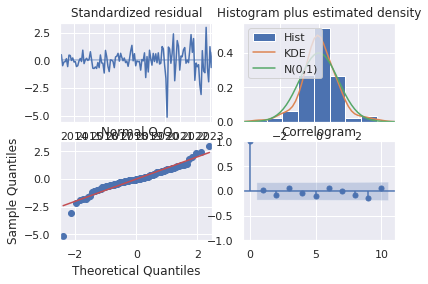

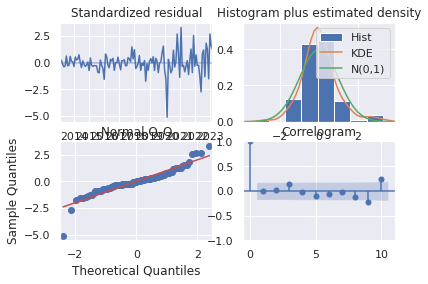

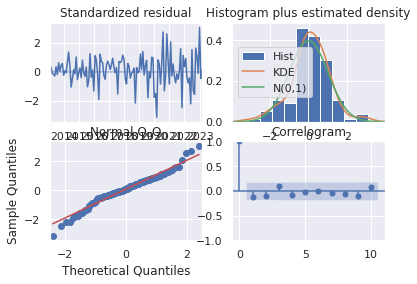

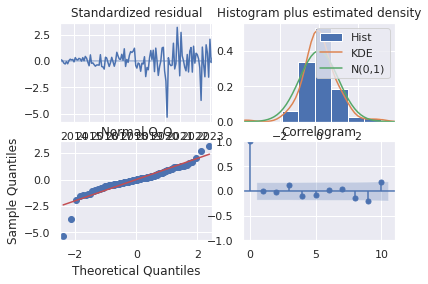

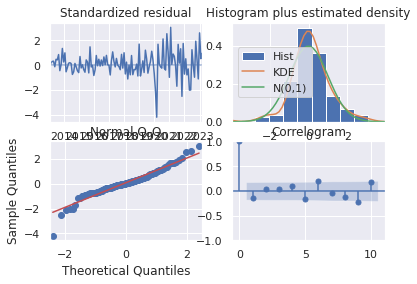

In [36]:
from pmdarima.arima import auto_arima
cols = df1.columns
for col in cols:
    print(col)
    model = auto_arima(df1[col], start_p=0, start_q=0)
    print(model.summary())
    print(model.plot_diagnostics())

CHH
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  122
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 140.420
Date:                Sat, 04 Mar 2023   AIC                           -274.841
Time:                        05:34:54   BIC                           -266.429
Sample:                    02-01-2013   HQIC                          -271.424
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0109      0.006      1.694      0.090      -0.002       0.024
ma.L1         -0.1979      0.082     -2.414      0.016      -0.359      -0.037
sigma2         0.0059      0.000     13.024     

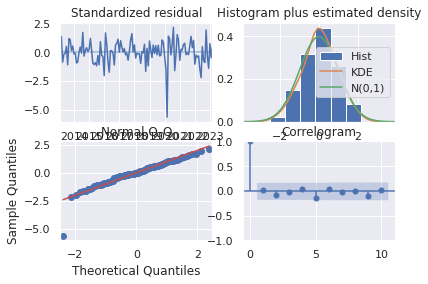

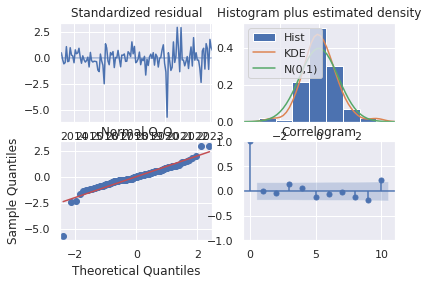

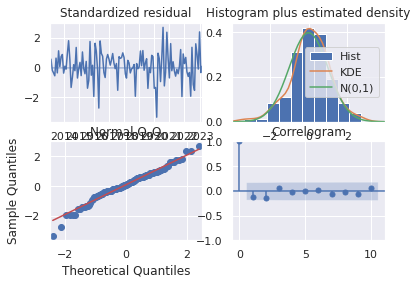

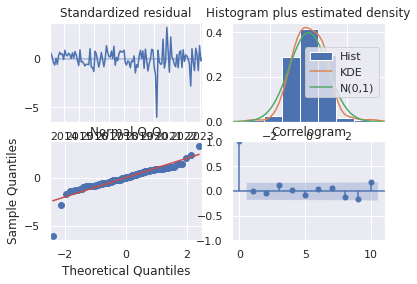

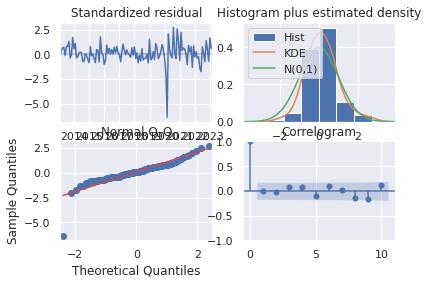

In [37]:
cols = df2.columns
for col in cols:
    print(col)
    model = auto_arima(df2[col], start_p=0, start_q=0)
    print(model.summary())
    print(model.plot_diagnostics())

In [39]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
# split into train and test sets
rmse = []
cols = df1.columns
for col in cols:
    print (col)
    X = df1[col]
    X.dropna()
    test_size1 = 36
    size = len(X) - test_size1     
    train, test = X[0:size], X[size:len(X)]
    #history = [x for x in train]
    model = auto_arima(train, start_p=0, start_q=0)
    output = model.predict(n_periods = len(test))
    test = pd.DataFrame(test)
    test['yhat'] = output
    test['yhat'].fillna(0)
    obs = test
    rmse = np.sqrt(mean_squared_error(test[col], test['yhat']))
    print('Test RMSE: %.3f' % rmse)

CHH
Test RMSE: 57.858
H
Test RMSE: 37.548
IHG
Test RMSE: 20.621
MAR
Test RMSE: 71.632
MGM
Test RMSE: 24.592


In [41]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
# split into train and test sets
rmse = []
cols = df2.columns
for col in cols:
    print (col)
    X = df2[col]
    X.dropna()
    test_size1 = 36
    size = len(X) - test_size1     
    train, test = X[0:size], X[size:len(X)]
    #history = [x for x in train]
    model = auto_arima(train, start_p=0,  start_q=0)
    output = model.predict(n_periods = len(test))
    test = pd.DataFrame(test)
    test['yhat'] = output
    test['yhat'].fillna(0)
    obs = test
    rmse = np.sqrt(mean_squared_error(test[col], test['yhat']))
    print('Test RMSE: %.3f' % rmse)

CHH
Test RMSE: 0.085
H
Test RMSE: 0.113
IHG
Test RMSE: 0.092
MAR
Test RMSE: 0.113
MGM
Test RMSE: 0.143


In [ ]:
test.describe()

,MGM,yhat
count,36.000000,36.0
mean,0.037746,0.0
std,0.139282,0.0
min,-0.188920,0.0
25%,-0.050571,0.0
50%,0.016471,0.0
75%,0.112610,0.0
max,0.362447,0.0
